# Dados Metereológicos Diários Automáticas

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

### Construção de um dataframe com as colunas que representam as variáveis 

In [2]:
#caminho do arquivo csv

file_path = Path(
    '../../Dados/Dados-Metereologicos/Horarios/' +\
     'dados_A320_H_A_2008-01-01_2013-12-31.csv'
     ) 

#importando o arquivo csv como um Dataframe

df_horario = pd.read_csv(file_path, 
                 header=9, #linha do cabeçalho
                 sep=';',  #separador
                 usecols= #colunas
                 ['Data Medicao', 
                  'Hora Medicao', 
                  'PRECIPITACAO TOTAL, HORARIO(mm)',
                  'RADIACAO GLOBAL(Kj/m²)',
                  'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
                  'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
                  'VENTO, RAJADA MAXIMA(m/s)',
                  'VENTO, VELOCIDADE HORARIA(m/s)' ]
                 )
df_horario.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01,0,0,"-3,54","25,9","26,1",8,"2,5"
1,2008-01-01,100,0,"-3,54","25,7",26,"8,6","2,2"
2,2008-01-01,200,0,"-3,54","25,7","25,9","7,5","2,9"
3,2008-01-01,300,0,"-3,54","25,5","25,7","6,1","2,6"
4,2008-01-01,400,0,"-3,54","25,4","25,5","5,6","1,6"


No momento de importação o pandas reconheceu a hora de medição como número inteiro, por isso é necessário ajustar as horas de medição para se tornarem um padrão reconhecido pelo datetime

In [3]:
#ajustando as horas de medição para se tornarem um padrão reconhecido pelo datetime

df_horario['Hora Medicao'] = (df_horario['Hora Medicao']//100).astype(str)+':'+'00' 
df_horario.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01,0:00,0,"-3,54","25,9","26,1",8,"2,5"
1,2008-01-01,1:00,0,"-3,54","25,7",26,"8,6","2,2"
2,2008-01-01,2:00,0,"-3,54","25,7","25,9","7,5","2,9"
3,2008-01-01,3:00,0,"-3,54","25,5","25,7","6,1","2,6"
4,2008-01-01,4:00,0,"-3,54","25,4","25,5","5,6","1,6"


In [4]:
#concatenando a hora com a data de medição e retirando a coluna das horas

df_horario['Data Medicao'] = df_horario['Data Medicao'] + ' ' + df_horario['Hora Medicao'].astype(str)
df_horario.drop('Hora Medicao', axis=1, inplace=True)
df_horario.head()

,Data Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01 0:00,0,"-3,54","25,9","26,1",8,"2,5"
1,2008-01-01 1:00,0,"-3,54","25,7",26,"8,6","2,2"
2,2008-01-01 2:00,0,"-3,54","25,7","25,9","7,5","2,9"
3,2008-01-01 3:00,0,"-3,54","25,5","25,7","6,1","2,6"
4,2008-01-01 4:00,0,"-3,54","25,4","25,5","5,6","1,6"


A coluna "Data Medicao" é composta por strings, então há a necessidade de transformar para Datetime e logo após transformar essa coluna, em uma coluna de índices

In [5]:
#transformando os valores da coluna em datetime

df_horario['Data Medicao'] = pd.to_datetime(df_horario['Data Medicao'])
df_horario.head()

,Data Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01 00:00:00,0,"-3,54","25,9","26,1",8,"2,5"
1,2008-01-01 01:00:00,0,"-3,54","25,7",26,"8,6","2,2"
2,2008-01-01 02:00:00,0,"-3,54","25,7","25,9","7,5","2,9"
3,2008-01-01 03:00:00,0,"-3,54","25,5","25,7","6,1","2,6"
4,2008-01-01 04:00:00,0,"-3,54","25,4","25,5","5,6","1,6"


In [6]:
#transformando a coluna das datas nos índices do dataframe

df_horario.set_index('Data Medicao', inplace=True)
df_horario.head()

,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,,
2008-01-01 00:00:00,0,"-3,54","25,9","26,1",8,"2,5"
2008-01-01 01:00:00,0,"-3,54","25,7",26,"8,6","2,2"
2008-01-01 02:00:00,0,"-3,54","25,7","25,9","7,5","2,9"
2008-01-01 03:00:00,0,"-3,54","25,5","25,7","6,1","2,6"
2008-01-01 04:00:00,0,"-3,54","25,4","25,5","5,6","1,6"


Podemos ainda perceber que apesar de estarem representando valores numéricos cada célula é uma string, que utiliza vírgula para representar os número racionais. Porém é necessário que utilizemos float para realizar os plots e para transformar strings em floats é necessário que sejam utilizados pontos ao invés de vírgulas.

In [7]:
#transformando os dados de string para float

for coluna in df_horario.columns:
    df_horario[coluna] = df_horario[coluna].str.replace(',','.').astype(float)

df_horario.head()

,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,,
2008-01-01 00:00:00,0.0,-3.54,25.9,26.1,8.0,2.5
2008-01-01 01:00:00,0.0,-3.54,25.7,26.0,8.6,2.2
2008-01-01 02:00:00,0.0,-3.54,25.7,25.9,7.5,2.9
2008-01-01 03:00:00,0.0,-3.54,25.5,25.7,6.1,2.6
2008-01-01 04:00:00,0.0,-3.54,25.4,25.5,5.6,1.6


### Criando o dataframe com os dados diários

Nessa próxima parte do código um novo dataframe é feito, agora contendo dados dos máximos diários.

In [8]:
df_diario = pd.DataFrame(columns= ['TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C)', 
                                 'TEMPERATURA MÁXIMA DIÁRIA (°C)',
                                 'VELOCIDADE MÁXIMA DO VENTO(m/s)',
                                 'VENTO, RAJADA MAXIMA DIÁRIA(m/s)',
                                 'PRECIPITACAO MÁXIMA(mm)',
                                 'RADIACAO GLOBAL MÁXIMA(Kj/m²)']
                       )


#A temperatura máxima do ar utilizando bulbo seco, será a temperatura do ar bulbo seco horária, máxima
df_diario['TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C)'] =\
    df_horario['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'].resample('D').max()


#A temperatura máxima diária será a maior temperatura das máximas temperaturas horárias
df_diario['TEMPERATURA MÁXIMA DIÁRIA (°C)'] =\
    df_horario['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'].resample('D').max()

#A velocidade maxima do vento será a máxima velocidade horária
df_diario['VELOCIDADE MÁXIMA DO VENTO(m/s)'] =\
    df_horario['VENTO, VELOCIDADE HORARIA(m/s)'].resample('D').max()

#A rajada máxima do vento será a máxima rajada horária
df_diario['VENTO, RAJADA MAXIMA DIÁRIA(m/s)'] =\
    df_horario['VENTO, RAJADA MAXIMA(m/s)'].resample('D').max()

#A precipitação máxima é a máxima precipitação horária total
df_diario['PRECIPITACAO MÁXIMA(mm)'] =\
    df_horario['PRECIPITACAO TOTAL, HORARIO(mm)'].resample('D').max()

#A radiação global máxima é a máxima radiação global horária
df_diario['RADIACAO GLOBAL MÁXIMA(Kj/m²)'] =\
    df_horario['RADIACAO GLOBAL(Kj/m²)'].resample('D').max()



df_diario.head()

,TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C),TEMPERATURA MÁXIMA DIÁRIA (°C),VELOCIDADE MÁXIMA DO VENTO(m/s),"VENTO, RAJADA MAXIMA DIÁRIA(m/s)",PRECIPITACAO MÁXIMA(mm),RADIACAO GLOBAL MÁXIMA(Kj/m²)
Data Medicao,,,,,,
2008-01-01,30.7,30.7,4.5,10.8,0.0,3610.771
2008-01-02,30.6,30.6,4.4,8.8,0.0,3167.936
2008-01-03,30.7,30.7,5.7,11.4,0.0,3429.173
2008-01-04,30.4,30.4,4.8,11.5,0.2,3115.432
2008-01-05,30.4,30.4,4.2,10.2,0.0,3456.494


### Gráficos 

In [9]:
#selecionando a aparência do gráfico
plt.style.use('seaborn-dark-palette')

label_x = 'Dias'
fmt = dt.DateFormatter('%d-%m')

#função que cria os subplots [3x2]
def met_subplots(fig_axes, coluna, label_y, legenda):
    
    ano = 2008
    #laço que percorre cada subplot, sendo i a linha e j a coluna desse.
    for i in range(3):
        for j in range(2):
            
            #selecionando o dado que vai ser plotado (divididos por anos) 
            df = df_diario.loc[df_diario.index.year == ano][coluna]
            
            #realizando o plot do dataframe do ano específico
            fig_axes[i,j].plot(df, label=legenda)

            #definindo o título do subplot
            fig_axes[i,j].set_title(f'Ano de {ano}', size=25)
            ano = ano + 1

            #definindo labels
            fig_axes[i,j].set_xlabel(label_x, size=20)
            fig_axes[i,j].set_ylabel(label_y, size=20)

            #ajustando os ticks
            fig_axes[i,j].tick_params(axis='x', labelsize=16, rotation=40)
            fig_axes[i,j].tick_params(axis='y', labelsize=16)

            #f1_axes[i,j].xaxis.set_major_locator(ticker.LinearLocator(52))
            fig_axes[i,j].xaxis.set_major_formatter(fmt)
            #f1_axes[i,j].xaxis.set_minor_locator(days)

            #adicionando a grade e a legenda ao subplot
            fig_axes[i,j].grid(True)
            if legenda != '':
                fig_axes[i,j].legend()

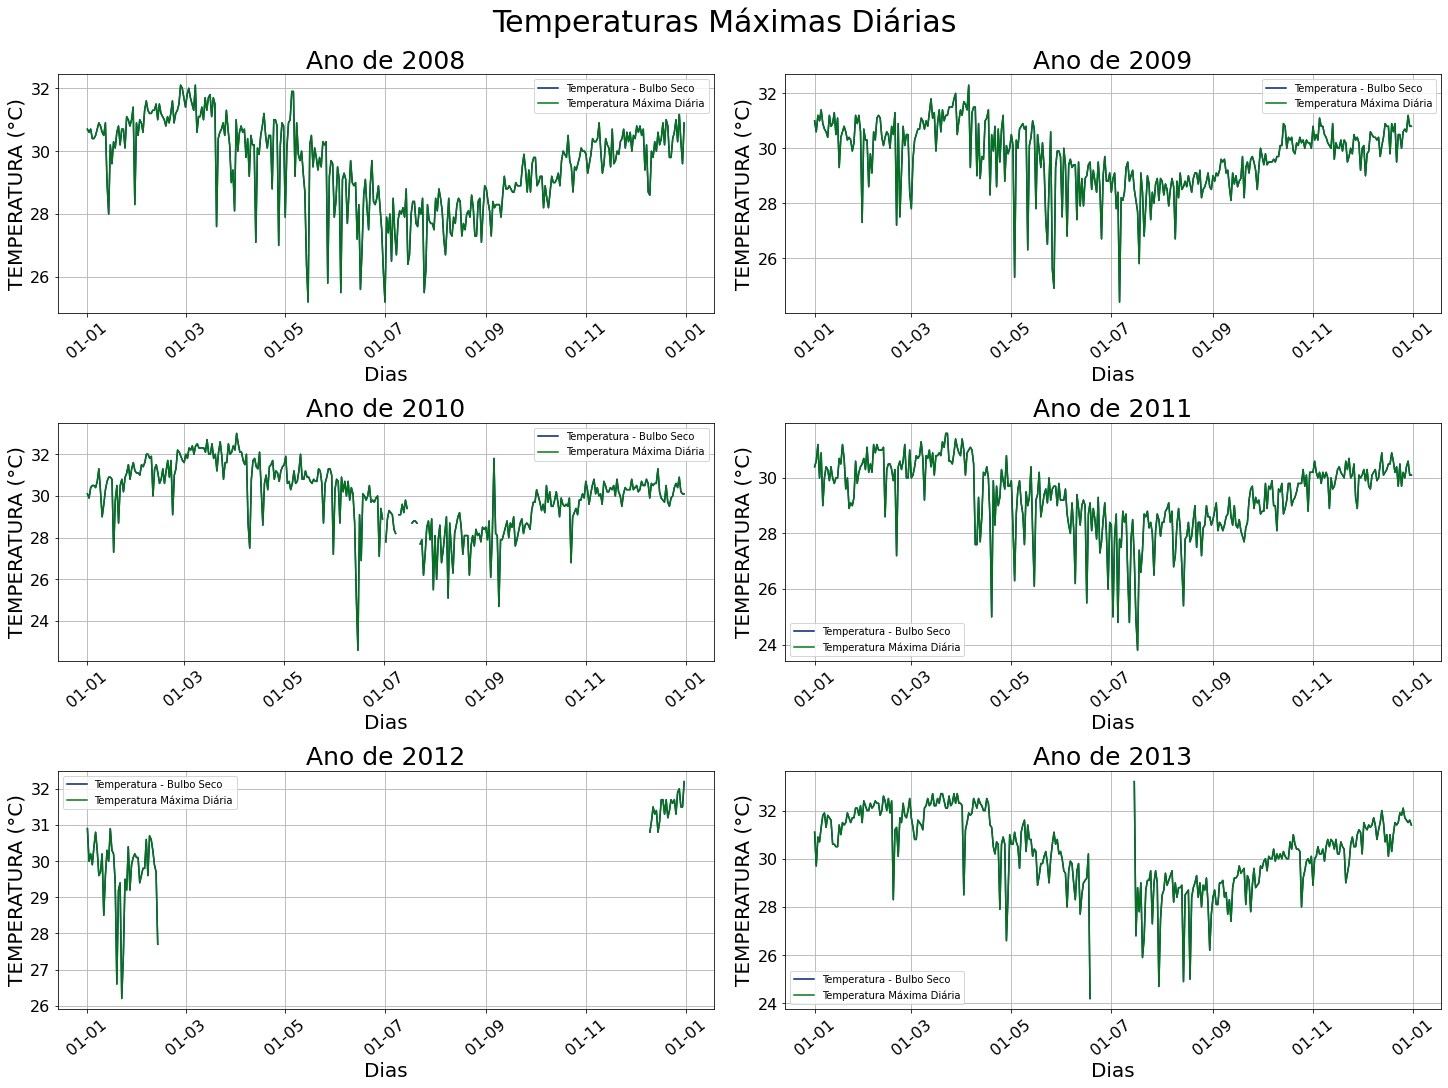

In [10]:
#Gráfico das temperaturas

fig1, f1_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

fig1.suptitle('Temperaturas Máximas Diárias',size=30)


#definindo uma lista com o nome de variáveis para facilitar possíveis alterações
colunas_temp = ['TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C)',
                  'TEMPERATURA MÁXIMA DIÁRIA (°C)']

#definindo variáveis sendo as labels dos eixos 
label_y_temp = 'TEMPERATURA (°C)'

#plotando o gráfico
met_subplots(f1_axes, colunas_temp[0], label_y_temp, 'Temperatura - Bulbo Seco')
met_subplots(f1_axes, colunas_temp[1], label_y_temp, 'Temperatura Máxima Diária')

#salvando a figura na pasta /Plots/Diarios com o nome de "Temperatura-Automatica.png"  
path_plot_temp = Path('./Plots/Diarios/Temperatura-Automatica.png')
fig1.savefig(path_plot_temp, format='png')

É possível perceber que a temperatura máxima diária é a mesma temperatura máxima de bulbo seco, ou seja, os dados utilizados pelo INMET para criar a variável "Temperatura máxima da hora anterior" é advinda da "Temperatura do ar - Bulbo Seco".

Ainda, nos dados referentes a temperatura podemos notar alguns dados faltantes em 2010 e fica explícito que em quase todo o ano de 2012 ocorreu algum problema na mensuração. Ainda, em 2013 conseguimos reparar alguns dados faltantes próximo ao mês 07 (Número exato do dia verificado ao fim do Notebook). Verificaremos ao longo dos outros gráficos que esse é um comportamento se repete, ou seja, não é um problema unicamente na mensuração dessa variável, mas sim em todas.

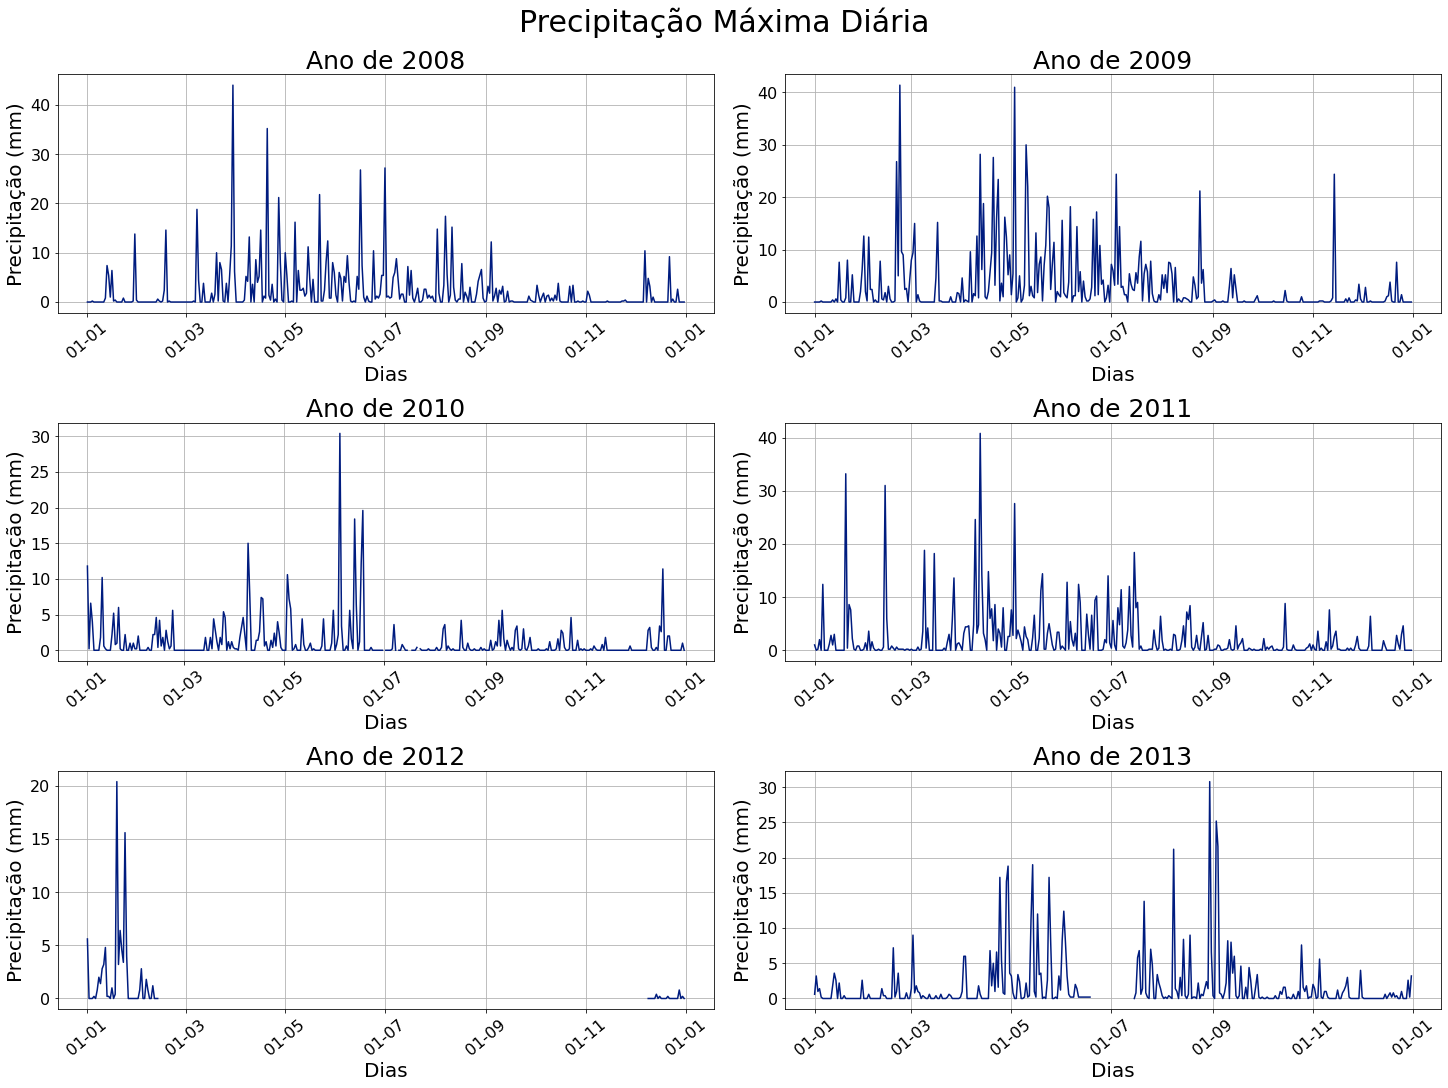

In [11]:
#Gráfico das chuvas
fig2, f2_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(20,15))

fig2.suptitle('Precipitação Máxima Diária',size=30)

#definindo uma variável que armazene o nome da coluna desejada  
colunas_chuva = 'PRECIPITACAO MÁXIMA(mm)'

#definindo o label do eixo y:
label_y_chuva = 'Precipitação (mm)'

#plotando o gráfico
met_subplots(f2_axes, colunas_chuva, label_y_chuva, '')

#salvando a figura na pasta /Plots/Diarios com o nome de "Chuvas-Automatica.png"  
path_plot_chuva = Path('./Plots/Diarios/Chuvas-Automatica.png') #utilizando essa biblioteca para que o código funcione em windows
fig2.savefig(path_plot_chuva, format='png')

Os anos de 2012 e 2013 dos gráficos de precipitação explicitam que nos intervalos em que as outras variáveis apresentam dados faltantes, os dados de precipitação apresentam o mesmo comportamento.

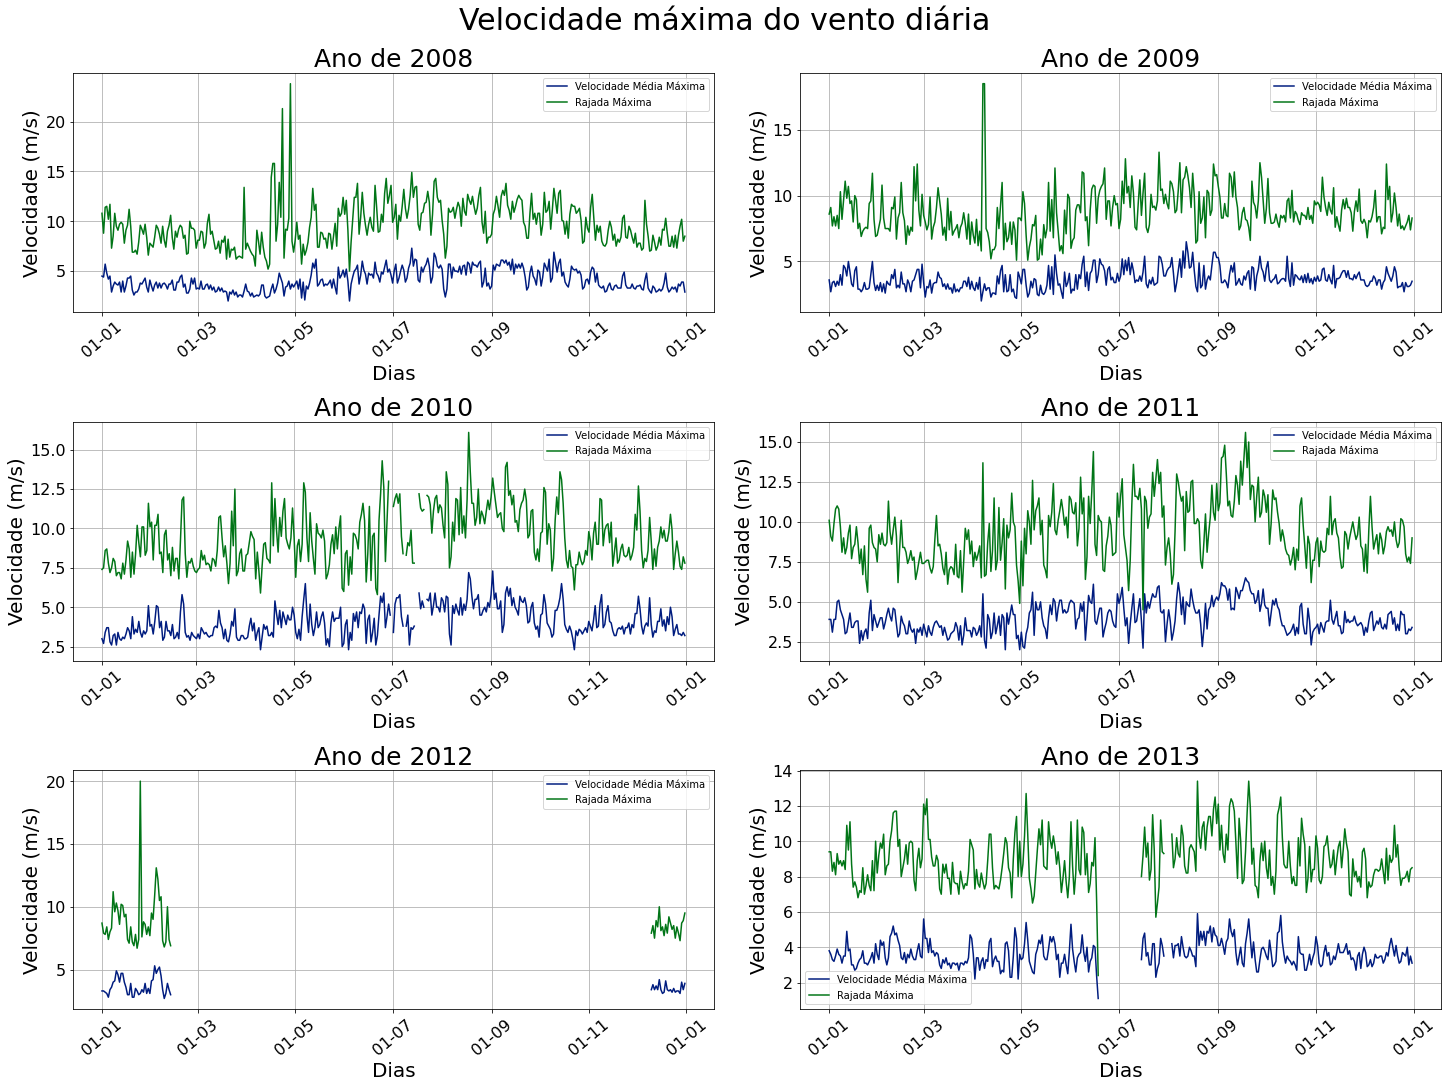

In [12]:
#Gráficos da velocidade do vento
fig3, f3_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(20,15))

fig3.suptitle('Velocidade máxima do vento diária',size=30)

#salvando em uma variável o nome das colunas do df vento
colunas_vento = ['VELOCIDADE MÁXIMA DO VENTO(m/s)', 
                   'VENTO, RAJADA MAXIMA DIÁRIA(m/s)']

#definindo o label do eixo y:
label_y_vento = 'Velocidade (m/s)'

#realizando o plot
met_subplots(f3_axes, colunas_vento[0], label_y_vento, 'Velocidade Média Máxima')
met_subplots(f3_axes, colunas_vento[1], label_y_vento, 'Rajada Máxima')

#salvando a figura na pasta /Plots/Diarios com o nome de "Ventos-Automatica.png"  
path_plot_temp = Path('./Plots/Diarios/Ventos-Automatica.png')
fig3.savefig(path_plot_temp, format='png')

Podemos verificar que os dados faltantes da velocidade do vento estão em intervalos iguais ou muito próximos dos dados faltantes das outras variáveis.

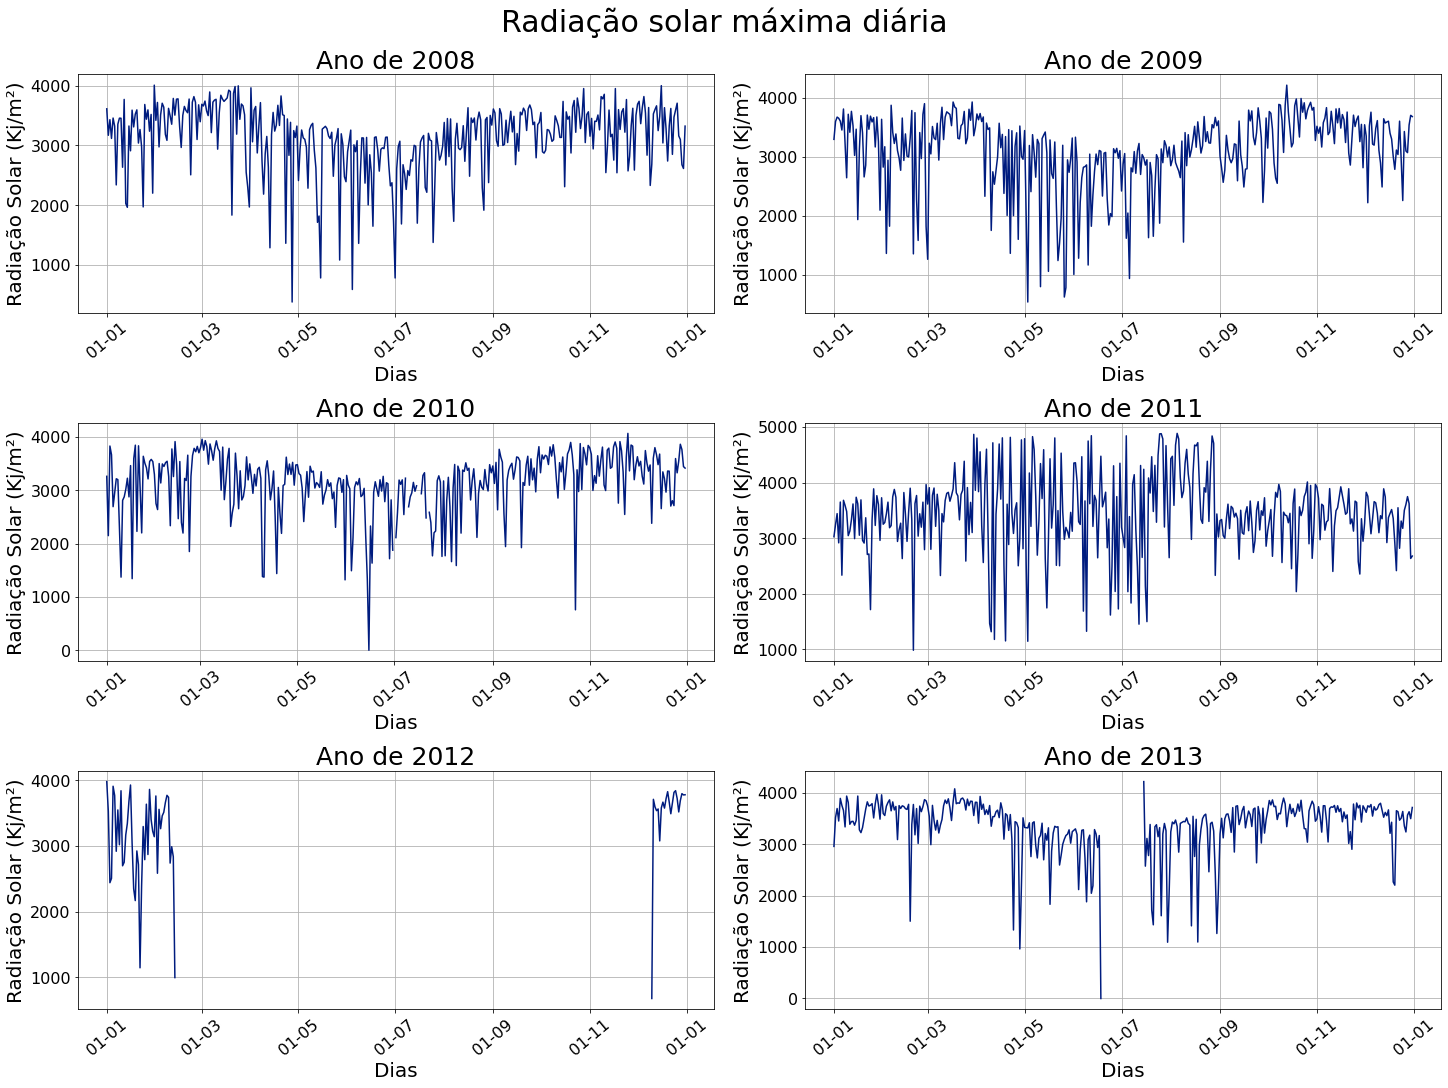

In [13]:
#Gráficos da radiação solar 
fig4, f4_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(20,15))

fig4.suptitle('Radiação solar máxima diária',size=30)

#salvando em uma variável o nome das colunas do df vento
colunas_radiacaosolar = ['RADIACAO GLOBAL MÁXIMA(Kj/m²)']

#definindo o label do eixo y:
label_y_radiacaosolar = 'Radiação Solar (Kj/m²)'

met_subplots(f4_axes, colunas_radiacaosolar, label_y_radiacaosolar, '')

#salvando a figura na pasta /Plots/Diarios com o nome de "Radiacao-Automatica.png"  
path_plot_temp = Path('./Plots/Diarios/Radiacao-Automatica.png') #utilizando essa biblioteca para que o código funcione em windows
fig4.savefig(path_plot_temp, format='png')

Podemos verificar os dados faltantes em intervalos similares aos mencionados em outras variáveis.

### Avaliando o intervalo de dias que apresentam uma quantidade explícita de dados faltantes

##### Nessa parte, é feito uma tabela com todos os dados diários do ano. As colunas e linhas que existem valores são preenchidas com False, do contrário é retornado um True, afirmando que existe dados faltantes. 

##### No caso dos dados pluviométricos foi visto graficamente que os dados faltantes foram representados como zeros, então alguns "True" da tabela na coluna pluviométrica não necessariamente representam dados faltantes, mas sim zeros verdadeiros.

#### Avaliando o intervalo de dias de 2010 que apresentam incongruência nos dados

##### É possível identificar alguns valores faltantes em 2010 mas não muitos.

In [14]:
#dividindo o dataframe por ano
dados_2010 = df_diario.loc[df_diario.index.year==2010].isnull()

#salvando as colunas
coluna = df_diario.columns

#Criando um dataframe que possui as linhas que existem dados faltantes
dados_faltantes_2010 =  dados_2010.loc[
    dados_2010[coluna[0]] | 
    dados_2010[coluna[1]] | 
    dados_2010[coluna[2]] | 
    dados_2010[coluna[3]] |
    dados_2010[coluna[4]] | 
    dados_2010[coluna[5]] == True 
]

display(dados_faltantes_2010)

,TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C),TEMPERATURA MÁXIMA DIÁRIA (°C),VELOCIDADE MÁXIMA DO VENTO(m/s),"VENTO, RAJADA MAXIMA DIÁRIA(m/s)",PRECIPITACAO MÁXIMA(mm),RADIACAO GLOBAL MÁXIMA(Kj/m²)
Data Medicao,,,,,,
2010-06-30,False,False,False,True,False,False
2010-07-01,True,True,True,True,True,True
2010-07-09,True,True,True,True,True,True
2010-07-16,True,True,True,True,True,True
2010-07-17,True,True,True,True,True,True
2010-07-22,True,True,True,True,True,True


#### Avaliando o intervalo de dias de 2012 que apresentam incongruência nos dados

##### É possível observar através disso que a partir do dia 14/02/2012 até o dia 09/12/2012 os dados são inconsistentes.

In [15]:
#dividindo o dataframe por ano
dados_2012 = df_diario.loc[df_diario.index.year==2012].isnull()


#Criando um dataframe que possui as linhas que existem dados faltantes
dados_faltantes_2012 =  dados_2012.loc[
    dados_2012[coluna[0]] | 
    dados_2012[coluna[1]] | 
    dados_2012[coluna[2]] | 
    dados_2012[coluna[3]] |
    dados_2012[coluna[4]] | 
    dados_2012[coluna[5]] == True 
]

display(dados_faltantes_2012)

,TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C),TEMPERATURA MÁXIMA DIÁRIA (°C),VELOCIDADE MÁXIMA DO VENTO(m/s),"VENTO, RAJADA MAXIMA DIÁRIA(m/s)",PRECIPITACAO MÁXIMA(mm),RADIACAO GLOBAL MÁXIMA(Kj/m²)
Data Medicao,,,,,,
2012-02-14,True,True,True,True,True,True
2012-02-15,True,True,True,True,True,True
2012-02-16,True,True,True,True,True,True
2012-02-17,True,True,True,True,True,True
2012-02-18,True,True,True,True,True,True
...,...,...,...,...,...,...
2012-12-05,True,True,True,True,True,True
2012-12-06,True,True,True,True,True,True
2012-12-07,True,True,True,True,True,True


#### Avaliando o intervalo de dias de 2013 que apresenta incongruência nos dados
##### Podemos verificar que os dados de 2013 apresentam inconsistência no dia 19/06/2013 até o dia 02/08/2013

In [16]:
#dividindo o dataframe por ano
dados_2013 = df_diario.loc[df_diario.index.year==2013].isnull()

#salvando as colunas
coluna = df_diario.columns

#Criando um dataframe que possui as linhas que existem dados faltantes
dados_faltantes_2013 =  dados_2013.loc[
    dados_2013[coluna[0]] | 
    dados_2013[coluna[1]] | 
    dados_2013[coluna[2]] | 
    dados_2013[coluna[3]] |
    dados_2013[coluna[4]] | 
    dados_2013[coluna[5]] == True 
]

display(dados_faltantes_2013)

,TEMPERATURA MÁXIMA DO AR-BULBO SECO(°C),TEMPERATURA MÁXIMA DIÁRIA (°C),VELOCIDADE MÁXIMA DO VENTO(m/s),"VENTO, RAJADA MAXIMA DIÁRIA(m/s)",PRECIPITACAO MÁXIMA(mm),RADIACAO GLOBAL MÁXIMA(Kj/m²)
Data Medicao,,,,,,
2013-06-19,True,True,True,True,True,True
2013-06-20,True,True,True,True,True,True
2013-06-21,True,True,True,True,True,True
2013-06-22,True,True,True,True,True,True
2013-06-23,True,True,True,True,True,True
2013-06-24,True,True,True,True,True,True
2013-06-25,True,True,True,True,True,True
2013-06-26,True,True,True,True,True,True
2013-06-27,True,True,True,True,True,True


#### Ao fim, desejo agora salvar em um arquivo csv o dataframe de radiação para que eu possa usa-lo para construir os dados semanais. 

In [17]:
df_rads = df_diario['RADIACAO GLOBAL MÁXIMA(Kj/m²)']
path_dados = Path('../../Dados/Dados-Metereologicos/Diarios/dados_radiacao.csv')
df_rads.to_csv(path_dados) 